## 1. Cities in Sweden - create dataset

In [319]:
import pandas as pd

swedish_cities = {"Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population": [347949, 975551, 233839, 583056]}
df = pd.DataFrame(swedish_cities)
print(df)

      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056


In [320]:
df_kommun = df["Kommun"]
df_kommun

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [321]:
df_gothenburg = df.loc[df['Kommun'] == 'Göteborg']
df_gothenburg

,Kommun,Population
3,Göteborg,583056


In [322]:
df_sorted = df.sort_values(by="Population", ascending= False)
print(df_sorted)

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839


In [323]:
df_largest = df_sorted.iloc[:3]
print(df_largest)

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


In [324]:
df_sorted["Population %"] = round(df_sorted["Population"] / 10379295 * 100, 1)
print(df_sorted)

      Kommun  Population  Population %
1  Stockholm      975551           9.4
3   Göteborg      583056           5.6
0      Malmö      347949           3.4
2    Uppsala      233839           2.3


## 2. Cities in Sweden - real dataset

In [325]:
import pandas as pd

# header = 6 means that the first 6 rows are not part of the data
# usecols = "A:F" means that we only want to read columns A to F
# sheet_name = "Totalt" means that we only want to read the sheet named "Totalt"
df = pd.read_excel("../Data/komtopp50_2020.xlsx", header=6, usecols="A:F", sheet_name="Totalt")
df.head()

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB


In [327]:
df.describe()

,2020,2019,2020.1,2019.1,%
count,290.000000,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862,0.154672
std,83.860002,83.856743,74627.031657,74292.525065,0.953047
min,1.000000,1.000000,2387.000000,2408.000000,-3.208917
25%,73.250000,73.250000,10014.500000,10075.000000,-0.392807
50%,145.500000,145.500000,16079.500000,15978.000000,0.147039
75%,217.750000,217.750000,36215.250000,36096.750000,0.737224
max,290.000000,290.000000,975551.000000,974073.000000,4.088165


In [328]:
df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"] 
df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [329]:
# Sort the cities by population from largest to smallest
df_sorted = df.sort_values(by="Folkmängd 2020", ascending=False)
df_sorted

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309


In [330]:
# Filter out the five smallest cities by population in 2020
df_five_smallest = df.sort_values(by="Folkmängd 2020").iloc[:5]
df_five_smallest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290,Bjurholm,2387,2408,-0.872093
194,289,289,Sorsele,2442,2489,-1.888309
29,288,288,Dorotea,2498,2551,-2.077617
5,287,287,Arjeplog,2718,2785,-2.405745
271,286,286,Åsele,2805,2794,0.393701


In [331]:
df_five_largest = df.sort_values(by="Folkmängd 2020", ascending=False).iloc[:5]
df_five_largest

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822


In [332]:
#  Use the DataFrame to calculate Sweden's population in 2019 and 2020
population_2019 = df["Folkmängd 2019"].sum()
population_2020 = df["Folkmängd 2020"].sum()

print(f"Populationen i Sverige 2019: {population_2019}")
print(f"Populationen i Sverige 2020: {population_2020}")

Populationen i Sverige 2019: 10327589
Populationen i Sverige 2020: 10379295


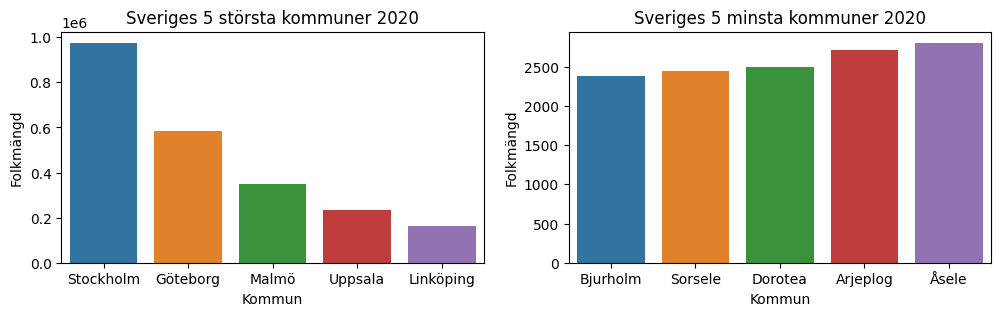

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 3))  # 1 row, 2 columns.
titles = ["Sveriges 5 största kommuner 2020", "Sveriges 5 minsta kommuner 2020"]
data_frames = [df_five_largest, df_five_smallest]
x_columns = ["Kommun", "Kommun"]
y_columns = ["Folkmängd 2020", "Folkmängd 2020"]

for i in range(2):
    sns.barplot(data=data_frames[i], x=x_columns[i], y=y_columns[i], ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel("Folkmängd")
    axes[i].set_xlabel("Kommun")
plt.show()

## 3. Cities in Sweden - gender

In [334]:
df_women = pd.read_excel(
    "../Data/komtopp50_2020.xlsx", header=6, usecols="A:F", sheet_name="Kvinnor"
)
df_men = pd.read_excel(
    "../Data/komtopp50_2020.xlsx", header=6, usecols="A:F", sheet_name="Män"
)

df_men["Kön"] = "Man"  # Add a new column with the value "Man"
df_women["Kön"] = "Kvinna"

df_men.columns = [
    "Rang 2020",
    "Rang 2019",
    "Kommun",
    "Folkmängd 2020",
    "Folkmängd 2019",
    "Förändring",
    "Kön",
]
df_women.columns = [
    "Rang 2020",
    "Rang 2019",
    "Kommun",
    "Folkmängd 2020",
    "Folkmängd 2019",
    "Förändring",
    "Kön",
]

In [335]:
# axis=0 merge vertically
# axis=1 merge horizontally

df_merged = pd.concat([df_men, df_women]) # axis=0 is default
df_merged = df_merged.set_index("Kommun").reset_index() 
df_merged

,Kommun,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,81,83,16256,16054,1.258253,Man
1,Alingsås,64,64,20702,20646,0.271239,Man
2,Alvesta,122,123,10367,10339,0.270819,Man
3,Aneby,255,255,3503,3498,0.142939,Man
4,Arboga,169,168,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
575,Österåker,55,57,22997,22442,2.473042,Kvinna
576,Östhammar,117,118,10846,10803,0.398038,Kvinna
577,Östra Göinge,160,159,7270,7262,0.110162,Kvinna
578,Överkalix,284,284,1559,1578,-1.204056,Kvinna


In [336]:
df.drop(
    columns=["Rang 2020", "Rang 2019"], inplace=True
)  # inplace=True means that we want to change the original DataFrame
df.rename(
    columns={
        "Folkmängd 2020": "Total Pop 2020",
        "Folkmängd 2019": "Total Pop 2019",
        "Förändring": "Total förändring",
    },
    inplace=True,
)
df.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.340740


In [337]:
df_merged = pd.merge(df_merged, df, on="Kommun")
df_merged.drop(columns=["Rang 2020", "Rang 2019"], inplace=True)
df_sorted = df_merged.sort_values(by="Folkmängd 2020", ascending=False)
df_sorted.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
397,Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
396,Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
114,Göteborg,292505,290308,0.756782,Man,583056,579281,0.651670
115,Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.651670
269,Malmö,175411,173543,1.07639,Kvinna,347949,344166,1.099179


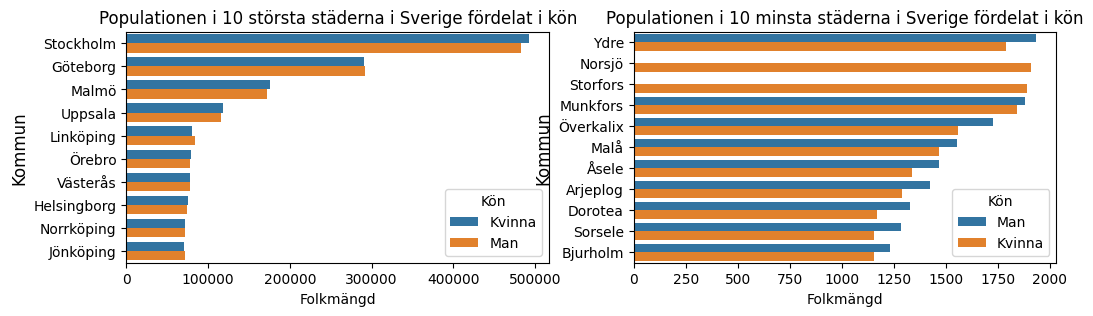

In [344]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
titles = ["Populationen i 10 största städerna i Sverige fördelat i kön", "Populationen i 10 minsta städerna i Sverige fördelat i kön"]
data_frames = [df_sorted.iloc[:20], df_sorted.iloc[-20:]]
x_columns = ["Folkmängd 2020", "Folkmängd 2020"]
y_columns = ["Kommun", "Kommun"]
hue = ["Kön", "Kön"]

for i in range(2):
    sns.barplot(
        data=data_frames[i],
        x=x_columns[i], 
        y=y_columns[i],
        hue=hue[i],
        ax=axes[i],
    )
    axes[i].set_title(titles[i]) 
    axes[i].set_ylabel("Kommun")
    axes[i].set_xlabel("Folkmängd")
plt.show()

In [339]:
df_men_count = df_men["Folkmängd 2020"].sum()
df_women_count = df_women["Folkmängd 2020"].sum()